# WEEK11 Car Listings Data Analysis: Cleaning, Exploration, and Visualization <hr style="border:2.5px solid #FFC0CB"></hr>

Name:**Wendy Sai D. Infante** <br>
Course:**CPE2A**

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 Load dataset

In [198]:
df = pd.read_csv(r"C:\Users\ASUS\Documents\CAR_DETAILS.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           3906 non-null   object
 5   seller_type    3906 non-null   object
 6   transmission   3906 non-null   object
 7   owner          3906 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Display initial data overview

In [199]:
print(df.isnull().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel             434
seller_type      434
transmission     434
owner            434
dtype: int64


In [200]:
num_cols = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [201]:
cat_cols = df.select_dtypes(include=[object]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0]) 

In [202]:
print("\nDuplicates before removal:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after removal:", df.duplicated().sum())


Duplicates before removal: 642
Duplicates after removal: 0


In [203]:
print(df.isnull().sum())

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [204]:
df['year'] = df['year'].astype(int)

In [205]:
df.describe()

,year,selling_price,km_driven
count,3698.000000,3.698000e+03,3698.000000
mean,2012.967280,4.784706e+05,68661.271769
std,4.252035,5.234857e+05,47239.887860
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,35002.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [206]:
df.to_csv("C:/Users/ASUS/Documents/CAR_DETAILS_CLEANED.csv", index=False)


In [207]:

print("\nData Cleaning Completed. Cleaned file saved.")


Data Cleaning Completed. Cleaned file saved.


## Data Visualization of Cleaned DataSet

In [208]:
df = pd.read_csv(r"..\raw\cleaned_car_details.csv",
                 delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2412 non-null   object
 1   year           2412 non-null   int64 
 2   selling_price  2412 non-null   int64 
 3   km_driven      2412 non-null   int64 
 4   fuel           2412 non-null   object
 5   seller_type    2412 non-null   object
 6   transmission   2412 non-null   object
 7   owner          2412 non-null   object
dtypes: int64(3), object(5)
memory usage: 150.9+ KB


In [209]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
1,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
2,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
3,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
4,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [210]:
df['brand'] = df['name'].apply(lambda x: x.split()[0])

In [211]:
brand_counts = df['brand'].value_counts()
brand_counts

brand
Maruti           732
Hyundai          443
Mahindra         226
Tata             204
Honda            146
Ford             137
Chevrolet        103
Toyota           100
Renault           86
Volkswagen        59
Nissan            38
Skoda             35
Datsun            23
Audi              20
Fiat              18
BMW               14
Mercedes-Benz      9
Mitsubishi         4
Jaguar             4
Jeep               2
Volvo              2
Ambassador         2
Daewoo             1
Force              1
MG                 1
Kia                1
Land               1
Name: count, dtype: int64

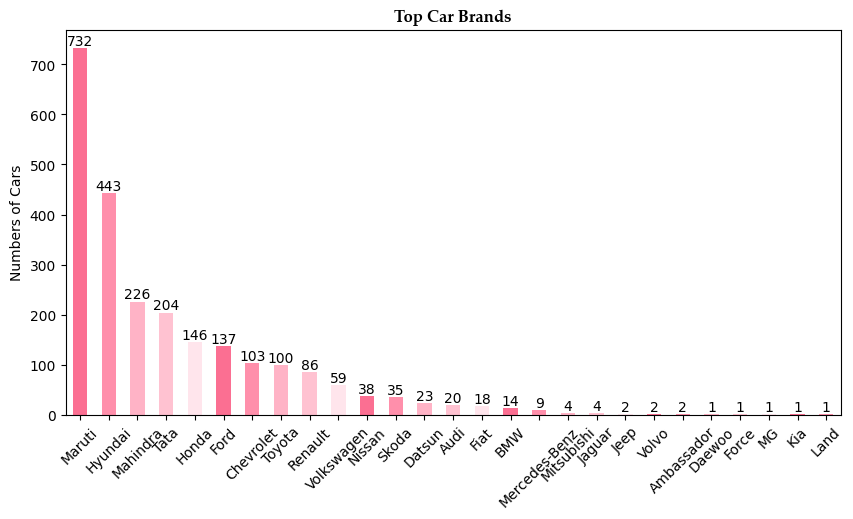

In [212]:
chart = brand_counts.plot(kind='bar',color = ['#FB6F92','#FF8FAB','#FFB3C6','#FFC2D1','#FFE5EC'], figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Top Car Brands', fontfamily = 'Palatino Linotype', fontsize=12, fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(brand_counts.index, rotation=45)
plt.ylabel('Numbers of Cars')
plt.show()

Top 10 brands

In [213]:
brand_counts = df['brand'].value_counts().head(10)
brand_counts

brand
Maruti        732
Hyundai       443
Mahindra      226
Tata          204
Honda         146
Ford          137
Chevrolet     103
Toyota        100
Renault        86
Volkswagen     59
Name: count, dtype: int64

In [214]:
type(brand_counts)

pandas.core.series.Series

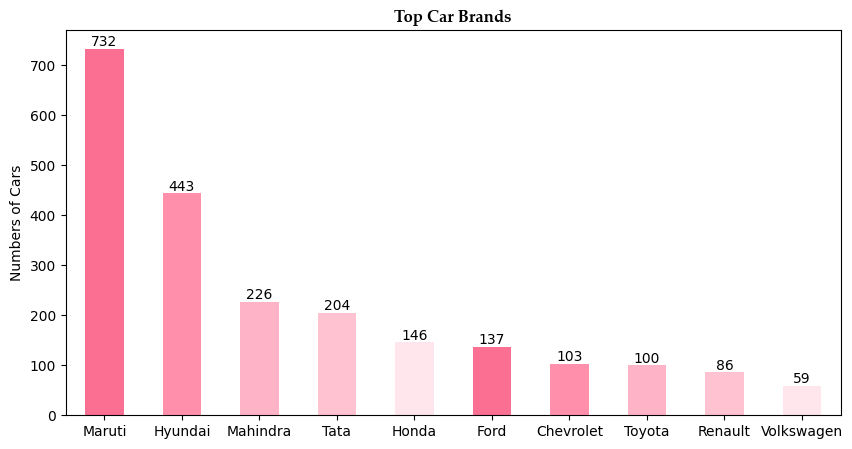

In [215]:
chart = brand_counts.plot(kind='bar',color = ['#FB6F92','#FF8FAB','#FFB3C6','#FFC2D1','#FFE5EC'], figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Top Car Brands', fontfamily = 'Palatino Linotype', fontsize=12, fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(brand_counts.index, rotation=0)
plt.ylabel('Numbers of Cars')
plt.show()

fuel count

In [216]:
fuel_counts = df['fuel'].value_counts()
fuel_counts

fuel
Diesel    1207
Petrol    1163
CNG         26
LPG         16
Name: count, dtype: int64

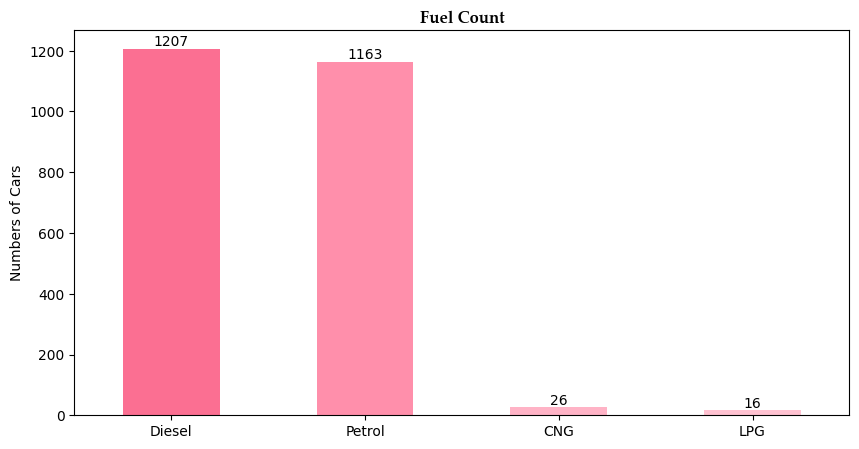

In [217]:
chart = fuel_counts.plot(kind='bar',color = ['#FB6F92','#FF8FAB','#FFB3C6','#FFC2D1','#FFE5EC'], figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Fuel Count', fontfamily = 'Palatino Linotype', fontsize=12, fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(fuel_counts.index, rotation=0)
plt.ylabel('Numbers of Cars')
plt.show()

Tranmission Type

In [218]:
t_counts = df['transmission'].value_counts()
t_counts

transmission
Manual       2217
Automatic     195
Name: count, dtype: int64

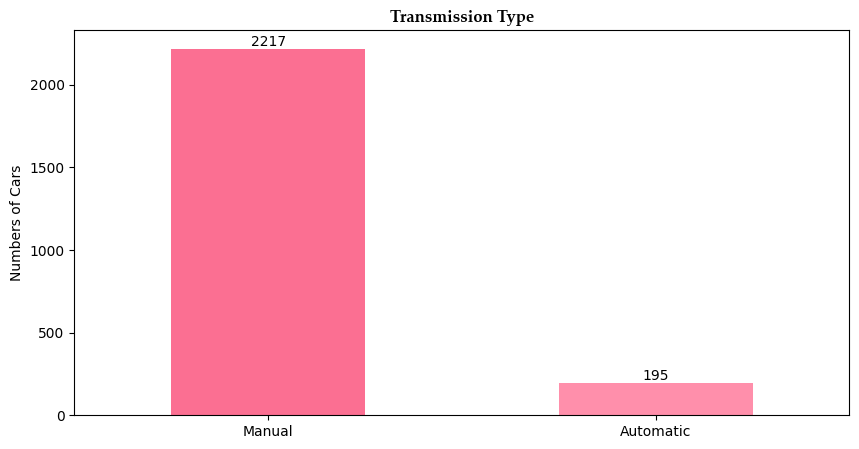

In [219]:
chart = t_counts.plot(kind='bar',color = ['#FB6F92','#FF8FAB','#FFB3C6','#FFC2D1','#FFE5EC'], figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Transmission Type', fontfamily = 'Palatino Linotype', fontsize=12, fontweight='bold')
plt.xlabel('')
chart.set_xticklabels(t_counts.index, rotation=0)
plt.ylabel('Numbers of Cars')
plt.show()

Price Depreciation Over Time (Year vs. Selling Price)

In [220]:
yearly_prices = df.groupby("year")["selling_price"].mean()

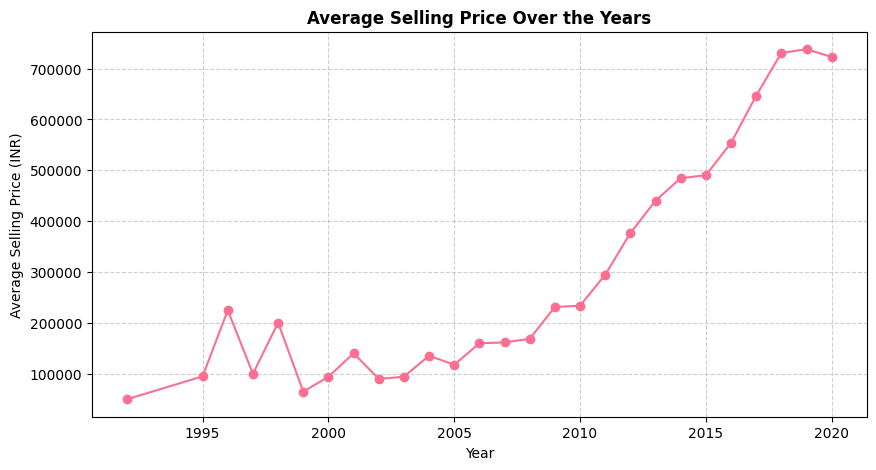

In [221]:
plt.figure(figsize=(10, 5))
plt.plot(yearly_prices.index, yearly_prices.values, marker='o', linestyle='-', color='#FB6F92')
plt.title("Average Selling Price Over the Years", fontsize=12, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Average Selling Price (INR)")
plt.grid(True, linestyle='--', alpha=0.6)  
plt.show()

Fuel Type vs. Selling Price

Kilometers Driven vs. Selling Price

In [224]:
owner_order = ["First Owner", "Second Owner", "Third Owner", "Fourth & Above Owner", "Test Drive Car"]

Manual vs. Automatic Transmission Popularity

In [225]:
transmission_counts = df["transmission"].value_counts()

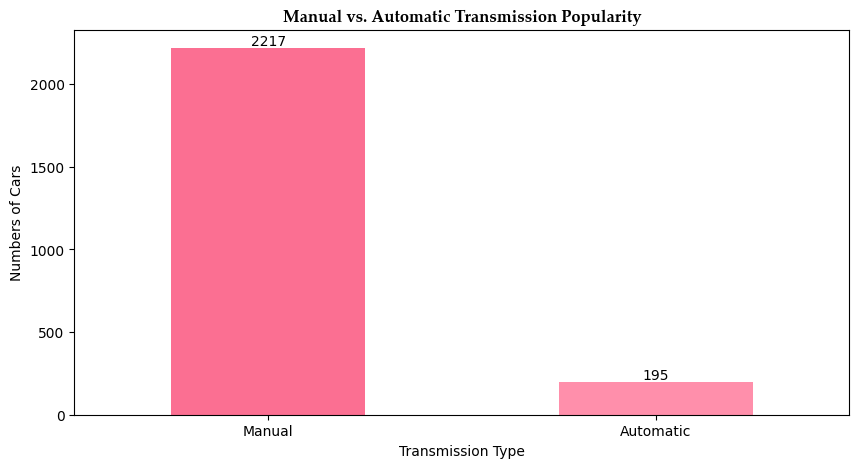

In [228]:
chart =transmission_counts.plot(kind='bar',color = ['#FB6F92','#FF8FAB','#FFB3C6','#FFC2D1','#FFE5EC'], figsize=(10,5))
chart.bar_label(chart.containers[0], label_type='edge')
plt.title('Manual vs. Automatic Transmission Popularity', fontfamily = 'Palatino Linotype', fontsize=12, fontweight='bold')
plt.xlabel('Transmission Type')
chart.set_xticklabels(transmission_counts.index, rotation=0)
plt.ylabel('Numbers of Cars')
plt.show()


 Seller Type vs. Price Differences